## Lab6
#### name: Zeng Yuhang
#### ID: 222320008
#### variant: 4

**1. Investigate features of my variant**
- Draw histograms for features.
- Draw sccatter plot matrix of features.
- Writhe comments about my investgation: what features are most useful for solving the problem and why, how features are distributed in the data.

In [36]:
# Draw histograms for features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.read_csv('./variants/4/balance-scale.data', header=None)

df.replace("L", 1, inplace=True)
df.replace("B", 2, inplace=True)
df.replace("R", 3, inplace=True)

df.head()

,0,1,2,3,4
0,2,1,1,1,1
1,3,1,1,1,2
2,3,1,1,1,3
3,3,1,1,1,4
4,3,1,1,1,5


In [37]:
x, y = df.shape
print(x, y)

625 5


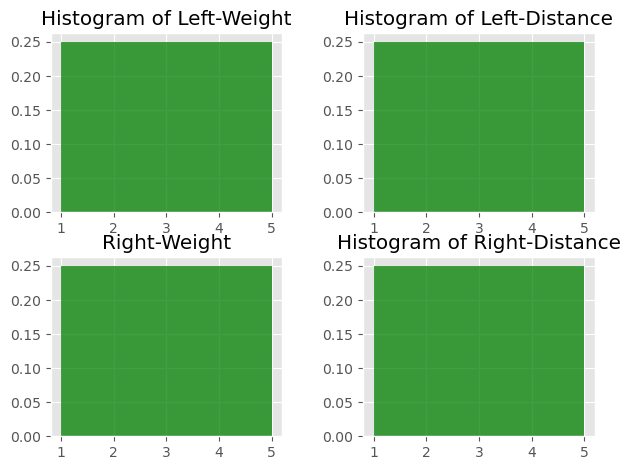

In [38]:
plt.figure()

plt.subplot(221)
plt.hist(df[1], 5, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of Left-Weight')
plt.grid(True)

plt.subplot(222)
plt.hist(df[2], 5, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of Left-Distance')
plt.grid(True)

plt.subplot(223)
plt.hist(df[3], 5, density=True, facecolor='g', alpha=0.75)
plt.title('Right-Weight')
plt.grid(True)

plt.subplot(224)
plt.hist(df[4], 5, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of Right-Distance')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()

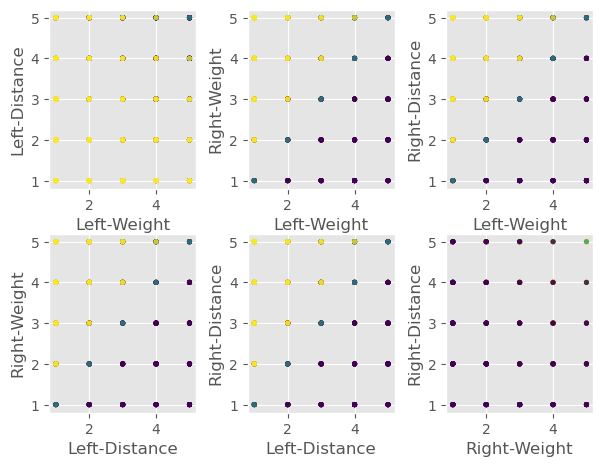

In [39]:
# Draw scatter plot matrix of features
color = np.array(df[0])

plt.figure()

plt.subplot(231)
plt.scatter(df[1], df[2], s=10, c=color, alpha=0.75)
plt.xlabel('Left-Weight')
plt.ylabel('Left-Distance')
plt.grid(True)

plt.subplot(232)
plt.scatter(df[1], df[3], s=10, c=color, alpha=0.75)
plt.xlabel('Left-Weight')
plt.ylabel('Right-Weight')
plt.grid(True)

plt.subplot(233)
plt.scatter(df[1], df[4], s=10, c=color, alpha=0.75)
plt.xlabel('Left-Weight')
plt.ylabel('Right-Distance')
plt.grid(True)

plt.subplot(234)
plt.scatter(df[2], df[3], s=10, c=color, alpha=0.75)
plt.xlabel('Left-Distance')
plt.ylabel('Right-Weight')
plt.grid(True)

plt.subplot(235)
plt.scatter(df[2], df[4], s=10, c=color, alpha=0.75)
plt.xlabel('Left-Distance')
plt.ylabel('Right-Distance')
plt.grid(True)

plt.subplot(236)
plt.scatter(df[3], df[4], s=10, c=color, alpha=0.75)
plt.xlabel('Right-Weight')
plt.ylabel('Right-Distance')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()

In [40]:
# Writhe comments about my investgation: what features are most useful for solving the problem and why, how features are distributed in the data

The features with both left and right informations look more useful, no matter what kind of information they have. For example, Left-Distance and Right-Weight together can show a relatively clearer boundary.

The features are distributed evenly.

**2. Investigate the API of probabilistic models in scikit-learn and train models for my task**
- try to train Naive Bayess models and write my own model using Kernel Density estimation.
- Estimate the results of training.
- Try to change parameters of training, apply transformations to features or create new features to achieve better results.

In [41]:
from sklearn.model_selection import train_test_split

X = df.loc[:, 1:]
Y = df.loc[:,0]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

X_train.shape, Y_train.shape

((500, 4), (500,))

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred).sum()))

Number of mislabeled points out of a total 125 points : 14


In [43]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

y_pred = mnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred).sum()))

Number of mislabeled points out of a total 125 points : 16


In [44]:
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB()
cnb.fit(X_train, Y_train)

y_pred = cnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred).sum()))

Number of mislabeled points out of a total 125 points : 17


In [45]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

y_pred = bnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred).sum()))

Number of mislabeled points out of a total 125 points : 70


In [46]:
from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB()
cnb.fit(X_train, Y_train)

y_pred = cnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred).sum()))

Number of mislabeled points out of a total 125 points : 13


In [47]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KernelDensity

class KDEClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        self.classes_ = None
        self.models_ = None
        self.logpriors_ = None

    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel).fit(Xi) for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0]) for Xi in training_sets]
        return self

    def predict_proba(self, X):
        logprobs = np.array([m.score_samples(X) for m in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(axis=1, keepdims=True)

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]

In [48]:
from sklearn.model_selection import GridSearchCV

bandwidths = 1.1 ** np.linspace(0, 2, 100)
grid = GridSearchCV(estimator=KDEClassifier(), param_grid={'bandwidth': bandwidths}, cv=5)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KDEClassifier(),
             param_grid={'bandwidth': array([1.        , 1.00192731, 1.00385834, 1.00579309, 1.00773157,
       1.00967378, 1.01161974, 1.01356945, 1.01552291, 1.01748014,
       1.01944115, 1.02140593, 1.0233745 , 1.02534686, 1.02732303,
       1.029303  , 1.03128679, 1.0332744 , 1.03526584, 1.03726112,
       1.03926025, 1.04126323, 1.04327007, 1.04528078, 1.04729536,
       1.04931383, 1...
       1.13332386, 1.13550813, 1.13769661, 1.1398893 , 1.14208623,
       1.14428739, 1.14649279, 1.14870244, 1.15091635, 1.15313452,
       1.15535697, 1.15758371, 1.15981473, 1.16205006, 1.16428969,
       1.16653364, 1.16878192, 1.17103453, 1.17329148, 1.17555278,
       1.17781844, 1.18008846, 1.18236286, 1.18464165, 1.18692482,
       1.1892124 , 1.19150438, 1.19380078, 1.19610161, 1.19840687,
       1.20071658, 1.20303073, 1.20534935, 1.20767244, 1.21      ])})

best accuracy: 0.9019999999999999
best parameter: 1.0493138290937885


Text(0.5, 1.0, 'The relationship between the average accuracy of KDE classifier cross validation and KDE bandwidth')

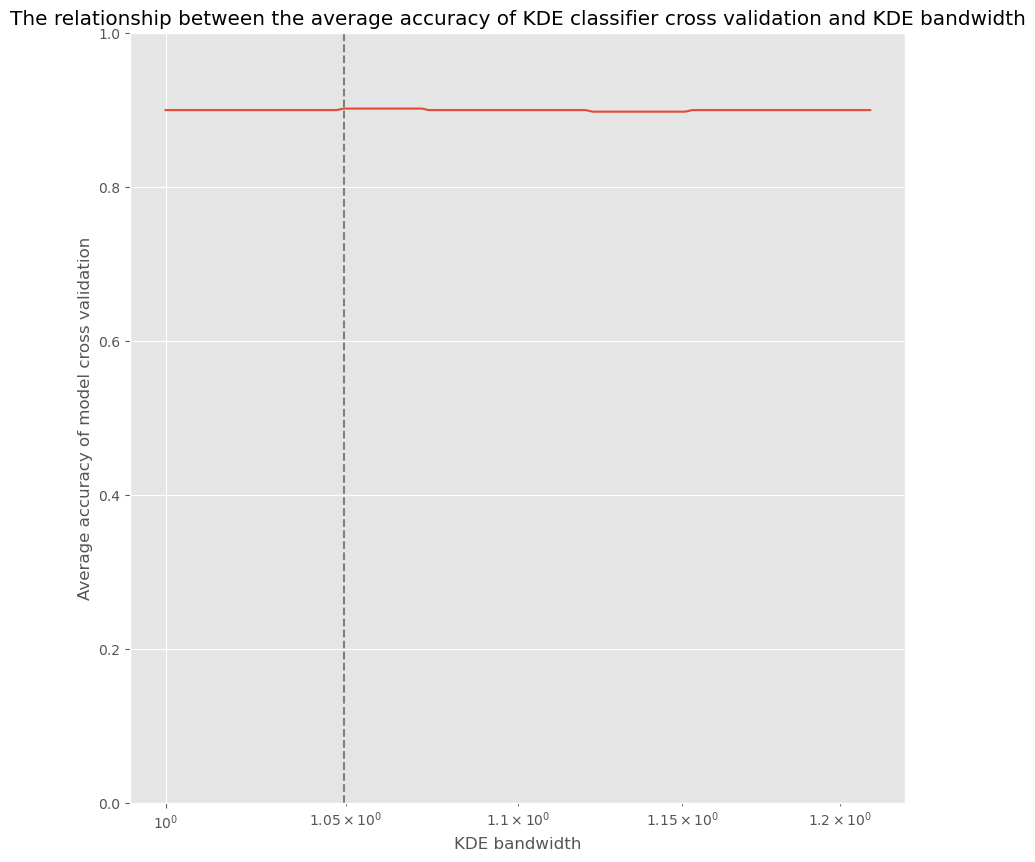

In [49]:
print(f'best accuracy: {grid.best_score_}')
print(f'best parameter: {grid.best_params_["bandwidth"]}')

plt.figure(figsize=(10, 10))
plt.semilogx(bandwidths, grid.cv_results_['mean_test_score'])
plt.vlines(x=grid.best_params_['bandwidth'], ymin=0, ymax=1, color='gray', linestyle='--')
plt.xlabel('KDE bandwidth')
plt.ylabel('Average accuracy of model cross validation')
plt.ylim(0, 1)
plt.title('The relationship between the average accuracy of KDE classifier cross validation and KDE bandwidth')

**3. Draw likelihood plot for you task and try to define outliers in the data.**

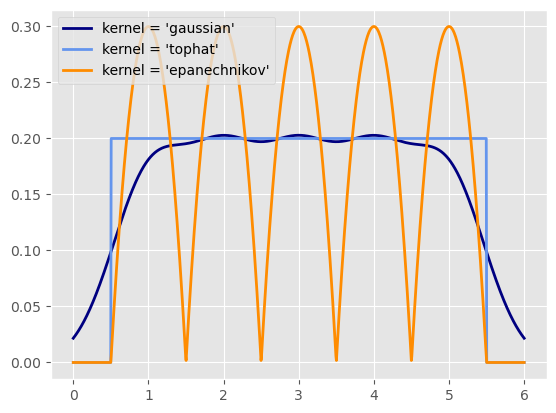

In [58]:
from scipy.stats import norm

fig, ax = plt.subplots()
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2
X_plot = np.linspace(0, 6, 1000)[:, np.newaxis]

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(np.array(df[1]).reshape(-1, 1))
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )
ax.legend(loc="upper left")
plt.show()

**8. Write a short report in your notebook about the results of the experiment.**

CategoricalNB performs best among the given algorithoms from sklearn.naive_bayes.

According to my model, the best performance appeares when bandwidth is a little more than 1. However, all features are integer, which means the bandwidth should be exactly 1. This is a confusing result.